In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()

# Creating traditional df

In [2]:
# Grabbing pitching csv as file
file = 'Data/baseballdatabank-2017.1/core/Pitching.csv'

# Throwing it into pandas
pitching_data = pd.read_csv(file)
pitching_data = pitching_data.set_index('yearID')
pitching_data = pitching_data.loc[2008:]

In [3]:
pitching_data.head()

,playerID,stint,teamID,lgID,W,L,G,GS,CG,SHO,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
yearID,,,,,,,,,,,,,,,,,,,,,
2008,aardsda01,1,BOS,AL,4,2,47,0,0,0,...,2.0,3.0,5.0,0,228.0,7.0,32,3.0,2.0,4.0
2008,accarje01,1,TOR,AL,0,3,16,0,0,0,...,2.0,1.0,1.0,0,56.0,6.0,10,0.0,1.0,3.0
2008,aceveal01,1,NYA,AL,1,0,6,4,0,0,...,0.0,1.0,0.0,0,120.0,1.0,8,0.0,0.0,3.0
2008,acostma01,1,ATL,NL,3,5,46,0,0,0,...,5.0,5.0,1.0,0,226.0,22.0,25,4.0,1.0,7.0
2008,adamsmi03,1,SDN,NL,2,3,54,0,0,0,...,2.0,0.0,0.0,0,259.0,11.0,18,2.0,3.0,2.0


# QOPA: Quality of Pitch Analysis (https://api.qopbaseball.com/) 

Legend of Pitch Types

-CH	Change Up	

-CU	Curveball

-FC	Cutter Fastball	

-FF	Four Seam Fastball

-FS	Split Finger Fastball	

-FT	Two Seam Fastball

-KC	Knuckle Curve	

-KN	Knuckleball

-SI	Sinker	

-SL	Slider

-FB	Fastball = {FC, FF, FS, FT, SI}	

-OS	Off Speed = {CH, CU, KC, KN, SL}

In [4]:
# Creating QOPA database
qopa_df = pd.DataFrame()
for i in range(2008,2018):
    file = 'Data/qopa_mlb_{}.csv'.format(i)
    _ = pd.read_csv(file)
    _['Year'] = i
    qopa_df = pd.concat([qopa_df, _])
    
# Limiting to pitchers w/ >100 pitches
qopa_df = qopa_df[qopa_df.NP > 100]

In [ ]:
# Adding FB summation column
#FC, FF, FS, FT, SI

# Number of pitches
qopa_df['FB_NP'] = (qopa_df.FC_NP + qopa_df.FF_NP + qopa_df.FS_NP + qopa_df.FT_NP + qopa_df.SI_NP)

# aggregating scores and dividing by number of pitches 
FC_comp = (qopa_df['FC_NP'].multiply(qopa_df.FC_QOPA, fill_value=0))
FF_comp = (qopa_df['FF_NP'].multiply(qopa_df.FF_QOPA, fill_value=0))
FS_comp = (qopa_df['FS_NP'].multiply(qopa_df.FS_QOPA, fill_value=0))
FT_comp = (qopa_df['FT_NP'].multiply(qopa_df.FT_QOPA, fill_value=0))
FI_comp = (qopa_df['SI_NP'].multiply(qopa_df.SI_QOPA, fill_value=0))
qopa_df['FB_QOPA'] = ((FC_comp + FF_comp + FS_comp + FT_comp + FI_comp) / qopa_df.FB_NP)

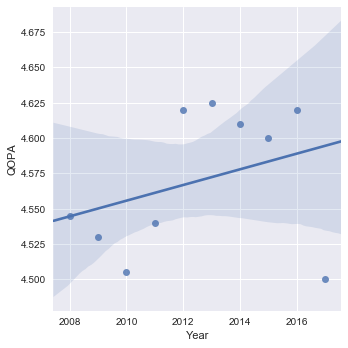

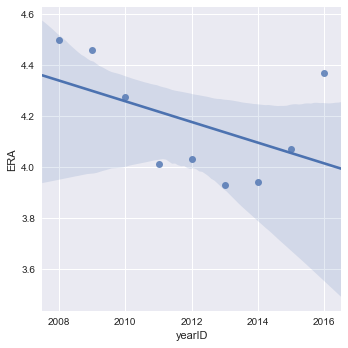

In [5]:
plt.clf()
_ = sns.lmplot(y='QOPA', x='Year',data=qopa_df.groupby('Year').median().reset_index())
_ = sns.lmplot(y='ERA', x='yearID', data=pitching_data.reset_index().groupby('yearID').median().reset_index())
plt.show()

# SCRAPPED FOR NOW
# Adding bio information and relating the tables


In [6]:
file = 'Data/baseballdatabank-2017.1/core/Master.csv'
master = pd.read_csv(file)

# Adding full Name
_ = []
for first, last in zip(master.nameFirst.values, master.nameLast.values):
    _.append(("{0} {1}".format(str(first).replace(' ',''), last)))
master['nameFull'] = _

# Filtering only >2008
master = master[master.finalGame > '2008-1-01']

In [7]:
# Creating the functions
def lehman_to_name(lehman):
    '''Take Lehman ID and return full name'''
    df = master.set_index('playerID')
    return df.loc[lehman]['nameFull']

def name_to_lehman(name):
    '''Take name and return Lehman ID'''
    df = master.set_index('nameFull')
    return df.loc[name]['playerID']

mismatch = []
for name in (qopa_df[qopa_df.NP<1000]['Name']):
    try:
        name_to_lehman(name)
    except KeyError:
        mismatch.append(name)
    

len(mismatch)

# Issue w/ Al Reyes name (Alberto), so setting the qopa value to 'Alberto'.

# Need to be commented out after run once
#_ = qopa_df[qopa_df['Name'] == 'Al Reyes'].index[0]
#qopa_df.set_value(_, 'Name', 'Alberto Reyes')

# Issue w/ Alex hinshaw
#_ = qopa_df[qopa_df['Name'] == 'Alexander Hinshaw'].index[0]
#qopa_df.set_value(_, 'Name', 'Alex Hinshaw')

# Issue w/ CC Sabatthia
#_ = qopa_df[qopa_df['Name'] == 'C.C. Sabathia'].index[0]
#qopa_df.set_value(_, 'Name', 'CC Sabathia')

# Issue w/ Cha Seung Baek
#_ = qopa_df[qopa_df['Name'] == 'Cha Seung Baek'].index[0]
#qopa_df.set_value(_, 'Name', 'Cha-Seung Baek')

# Issue w/ Chan Ho Park
#_ = qopa_df[qopa_df['Name'] == 'Chan Ho Park'].index[0]
#qopa_df.set_value(_, 'Name', 'ChanHo Park')

# Issue w/ Chris Carpenter
#_ = qopa_df[qopa_df['Name'] == 'Chris John Carpenter'].index[0]
#qopa_df.set_value(_, 'Name', 'Chris Carpenter')

# Issue w/ Cam Bedrosian
#_ = qopa_df[qopa_df['Name'] == 'Cameron Bedrosian'].index[0]
#qopa_df.set_value(_, 'Name', 'Cam Bedrosian')


# Applying
#qopa_df['playerID'] = qopa_df['Name'].apply(name_to_lehman)

# Random Number Generators and hacker statistics

In [8]:
# Bernouli trial: True or False binary choice
#ie > or < 0.5
np.random.random()

0.8163237071830589

In [9]:
np.random.seed(42)
random_numbers = np.random.random(size=4)
print(random_numbers)
heads = random_numbers < 0.5
print(heads)
np.sum(heads)

[ 0.37454012  0.95071431  0.73199394  0.59865848]
[ True False False False]


1

In [10]:
# Probability of getting all 4 heads
# simulate coin flips 1000 times

n_all_heads = 0
for trial in range(1000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads +=1

n_all_heads/1000

0.068

## np.empty(n) creates an empty array of n length
- Faster than list.append() in memory

In [11]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success +=1

    return n_success

perform_bernoulli_trials(100,0.5)

51

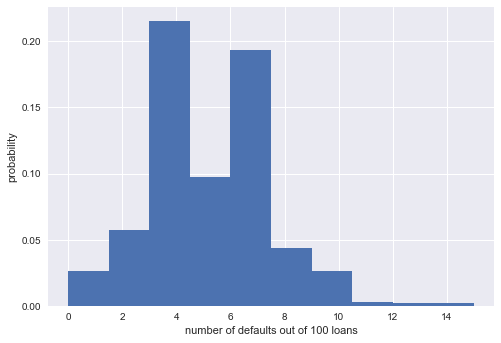

In [12]:
# Examing projected Bank Loan Defaults (out of 1000 w/ 0.05 default rate)

# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

# Probability Mass Function (PMF)
* Set of probabilities of discrete outcomes
Discrete Uniform PMF: e.g. Die- have a uniform PMF because 1/6 chance for each side

Binomial Distribution: # of r successes in n Bernouli trials w/ p probability of success is a binomial distribution

In [13]:
np.random.binomial(4,0.5, size= 10) # n = number of bernouli trials, p = probability of success, over size = n trials

array([2, 2, 2, 2, 2, 2, 3, 3, 2, 2])

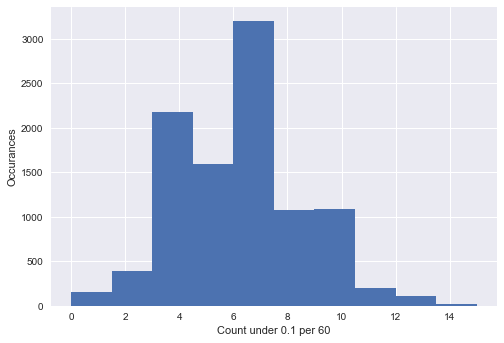

In [14]:
# Plotting the Binomial PMF
samples = np.random.binomial(60, 0.1,10000)
_ = plt.hist(samples)
_ = plt.xlabel('Count under 0.1 per 60')
_ = plt.ylabel('Occurances')
plt.show()

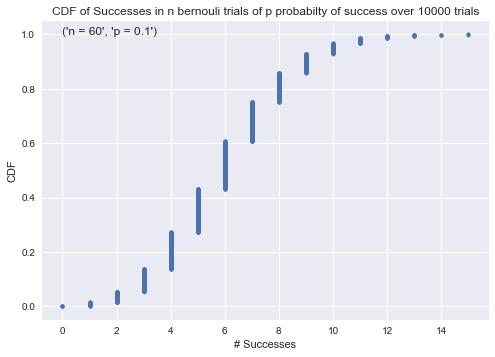

In [15]:
# Binomial CDF is just as informative

#ecdf (see np_eda)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    return np.sort(data), (np.arange(1, 1+ (len(data))) / (len(data)))

x,y = ecdf(samples)
_ = plt.plot(x,y, '.', linestyle = 'none')
_ = plt.xlabel('# Successes')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of Successes in n bernouli trials of p probabilty of success over 10000 trials')
_ = plt.annotate(xy= (0,1),s =('n = 60','p = 0.1'))
plt.show()

In [16]:
# Creating database of pitchers
pitchers = pd.read_csv('../MLB_Data/Data/baseballdatabank-2017.1/core/Pitching.csv')
pitchers = pitchers[pitchers.yearID > 2007]
pitchers = pitchers.groupby('playerID').sum()

# Working with getting pitcher names standardized


# Inner joining to master to redo master list w/ only pitchers
master = master.join(pitchers, on='playerID',how='inner', lsuffix= 't', rsuffix='').reset_index()

# Check list of errors of qopa_name --> master name, and master_name -->pitcher
lehmen_err = []
for name in master.playerID:
    try:
        name_to_lehman(name)
    except KeyError:
        lehmen_err.append(name)

name_err = []
for name in qopa_df.Name:
    try:
        lehman_to_name(name)
    except KeyError:
        name_err.append(name)
        
for i in zip(lehmen_err,name_err):
    print(i)
   
for name in master.playerID:
    print(lehman_to_name(name))
    
_ = []
for name in qopa_df.Name:
    try:
        _.append(name_to_lehman(name))
    except KeyError:
        _.append('NA')

qopa_df['BBRefID'] = _

qopa_sample = qopa_df[len(qopa_df.BBRefID.values) > 3]

# Poisson Processs:
## Timing of next event is completely independant of previous event
### (eg: Hits on website, births in hospitals)
## Poisson Distribution: The number of r arrivals in given time interval w/ average rate of λ arrivals/interval is Poisson distributed
## Limit of the binomial distribution for low probability of success and large number of trials (rate events)


In [17]:
np.random.poisson(lam=1.0, size=10)

array([1, 0, 1, 2, 1, 0, 1, 0, 2, 0])

In [18]:
# Probability of 20 game winner

# Get poisson distribution of campers/year using the mean campers/year, and take 10000 samples
_ = np.random.poisson(np.mean(pitching_data[pitching_data.GS > 20].W), size=10000)
# Number of times predicted to have over 560,000 campers
__ = np.sum(_> 19)
# Probability of a given sample being over 550000
prob = __/10000
print("Probability of Pitcher having 20+ win season: ", prob)
print("Number of 20+ Win Seasons: ", np.sum(pitching_data.W > 19))
print("Expected # of 20+ Win Seasons: ", prob*len(pitching_data[pitching_data.GS > 20].W))

Probability of Pitcher having 20+ win season:  0.0123
Number of 20+ Win Seasons:  23
Expected # of 20+ Win Seasons:  12.5829


In [19]:
# Probability of over 70 shutouts in a year

# Data
_ = pitching_data.reset_index().groupby('yearID').sum()['SHO']

# Get poisson distribution of SHO/yr using mean shutouts per year and take 10000 samples
__ = np.random.poisson(_.mean(), size = 10000)

# Number of times predicted over 70
___ = np.sum(__ > 69)

# Probability of given sample being over 70
prob = ___/10000

print("We expect each year has a {}% chance of having over 70 shutouts in a year".format(prob))
print("Years >/ 70 SO: ", np.sum(pitching_data.reset_index().groupby('yearID').sum()['SHO'] > 69))

We expect each year has a 0.0822% chance of having over 70 shutouts in a year
Years >/ 70 SO:  1


# Probability Density Function
## Continuous Variables (eg speed of train)
### Probability Density Function (PDF) (continuous analog to PMF, normally distributed)
#### Probaility of observing a single continous varibale

# Normal Distribution
## Continuous variable, PDF is symmetric, and has a single peak
## Mean determines where the center of the peak is, standard deviation is how spread out the peak is
### NOT == to std dev and mean from data
## Because of binning bias in histograms, better to compare it to the theoretical normal distribution (np.random.normal)

/Users/joelelster/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


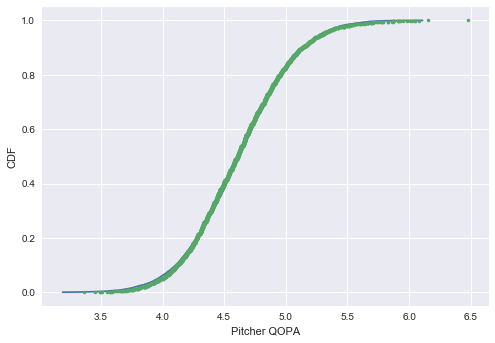

In [20]:
# Defining Database (all QOPA for all years for all pitchers > 500 pitches)
_ = qopa_df.QOPA[qopa_df.NP > 500]

# Grabbing theoretical distribution
mean = np.mean(_)
std = np.std(_)
samples = np.random.normal(mean, std, size=10000)

# Now taking real ecdf
x,y = ecdf(_)
x_theoretical, y_theoretical = ecdf(samples)

# Now graphing both theoretical and actual data
_ = plt.plot(x_theoretical, y_theoretical)
_ = plt.plot(x,y, marker = '.', linestyle= 'none')
_ = plt.xlabel('Pitcher QOPA')
_ = plt.ylabel('CDF')
plt.legend()
plt.show()

# This data is normally distributed

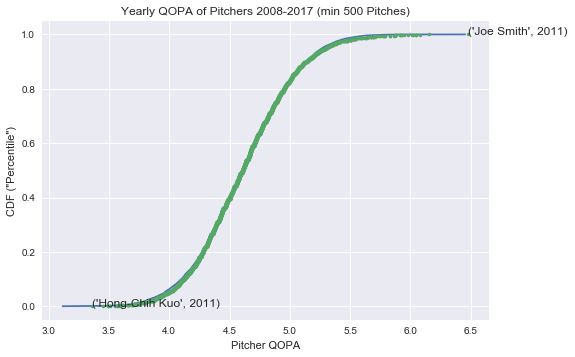

In [21]:
# Defining Database (all QOPA for all years for all pitchers > 500 pitches)
_ = qopa_df.QOPA[qopa_df.NP > 500]

best = _.max()
best_name = qopa_df.set_index('QOPA').loc[best].Name
best_year = qopa_df.set_index('QOPA').loc[best].Year
worst = _.min()
worst_name = qopa_df.set_index('QOPA').loc[worst].Name
worst_year = qopa_df.set_index('QOPA').loc[worst].Year


# Grabbing theoretical distribution
mean = np.mean(_)
std = np.std(_)
samples = np.random.normal(mean, std, size=10000)

# Now taking real ecdf
x,y = ecdf(_)
x_theoretical, y_theoretical = ecdf(samples)

# Now graphing both theoretical and actual data
_ = plt.plot(x_theoretical, y_theoretical)
_ = plt.plot(x,y, marker = '.', linestyle= 'none')
_ = plt.xlabel('Pitcher QOPA')
_ = plt.ylabel('CDF ("Percentile")')
_ = plt.title('Yearly QOPA of Pitchers 2008-2017 (min 500 Pitches)')

_ = plt.annotate(xy=(x.max(), y.max()), s=(best_name, best_year))
_ = plt.annotate(xy=(x.min(), y.min()), s=(worst_name, worst_year))
plt.show()

In [22]:
qopa_df

,PitcherID,Name,QOPA,NP,CH_QOPA,CH_NP,CU_QOPA,CU_NP,FC_QOPA,FC_NP,...,FT_NP,KC_QOPA,KC_NP,KN_QOPA,KN_NP,SI_QOPA,SI_NP,SL_QOPA,SL_NP,Year
0,150359,A.J. Burnett,4.65,3530,4.10,186,NaN,0,NaN,0,...,0,4.26,1062,NaN,0,5.37,566,NaN,0,2008
1,451262,A.J. Murray,5.22,146,4.92,20,5.34,14,4.82,19,...,24,NaN,0,NaN,0,NaN,0,NaN,0,2008
2,346871,Aaron Cook,5.21,2987,NaN,0,4.82,39,NaN,0,...,0,NaN,0,NaN,0,5.44,1995,5.00,405,2008
3,421685,Aaron Harang,5.38,2923,5.16,116,4.83,126,NaN,0,...,626,NaN,0,NaN,0,NaN,0,5.27,616,2008
4,408310,Aaron Heilman,4.13,1399,3.70,303,3.42,32,NaN,0,...,0,NaN,0,NaN,0,4.32,899,3.98,158,2008
5,444836,Aaron Laffey,4.00,1438,3.97,297,NaN,0,NaN,0,...,0,NaN,0,NaN,0,4.51,258,4.17,246,2008
8,284566,Adam Eaton,4.81,1744,4.53,292,4.32,111,4.54,197,...,538,NaN,0,NaN,0,NaN,0,3.60,268,2008
9,429400,Adam Loewen,4.48,447,4.33,52,4.68,111,4.63,10,...,40,NaN,0,NaN,0,NaN,0,NaN,0,2008
11,452240,Adam Russell,4.24,441,2.90,16,NaN,0,NaN,0,...,0,NaN,0,NaN,0,4.24,313,4.42,112,2008
12,425794,Adam Wainwright,5.26,1819,4.72,128,4.82,317,5.03,394,...,0,NaN,0,NaN,0,5.62,826,NaN,0,2008


In [23]:
pitching_data[(pitching_data.teamID == 'LAA') & (pitching_data.IPouts > 40)].reset_index().set_index(['playerID','yearID'])

,,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
playerID,yearID,,,,,,,,,,,,,,,,,,,,,
arredjo01,2008,1,LAA,AL,10,2,52,0,0,0,0,...,0.0,1.0,1.0,0,244.0,10.0,15,0.0,0.0,6.0
bootcch01,2008,1,LAA,AL,0,1,10,0,0,0,0,...,0.0,2.0,0.0,0,90.0,4.0,18,0.0,0.0,0.0
bulgeja01,2008,1,LAA,AL,0,0,14,0,0,0,0,...,0.0,0.0,2.0,0,73.0,7.0,13,0.0,0.0,1.0
garlajo01,2008,1,LAA,AL,14,8,32,32,1,0,0,...,4.0,4.0,8.0,0,864.0,0.0,116,8.0,8.0,25.0
lackejo01,2008,1,LAA,AL,12,5,24,24,3,0,0,...,1.0,5.0,10.0,0,675.0,0.0,71,5.0,1.0,21.0
louxsh01,2008,1,LAA,AL,0,0,7,0,0,0,0,...,0.0,0.0,2.0,0,66.0,5.0,6,1.0,0.0,3.0
moseldu01,2008,1,LAA,AL,2,4,12,10,0,0,0,...,0.0,3.0,2.0,1,237.0,1.0,38,1.0,3.0,3.0
odayda01,2008,1,LAA,AL,0,1,30,0,0,0,0,...,6.0,1.0,4.0,0,194.0,17.0,24,2.0,1.0,4.0
oliveda02,2008,1,LAA,AL,7,1,54,0,0,0,0,...,2.0,3.0,4.0,0,291.0,9.0,24,4.0,3.0,8.0


In [414]:
# Creating angels pitching list

# empty list full of angels pitchers and year, and then populating
_ = []
for i in pitching_data[(pitching_data.teamID == 'LAA') & (pitching_data.IPouts > 40)].reset_index().set_index(['playerID', 'yearID']).index:
    _.append((lehman_to_name(i[0]),i[1]))

# Creating a good (matching) and bad (non matching) list of player names & their years   
good = []
bad = []
for i in _:
    name = i[0]
    try:
        qopa_df.set_index('Name').loc[i[0]]
        good.append(i)
    except KeyError:
        bad.append(i)
        
# Using matching index of transformed name and year, creating a pitching dataset of angels pitchers w/ > 300 NP
angels_qopa = qopa_df.set_index(['Name', 'Year']).loc[good]
angels_qopa = angels_qopa[angels_qopa.NP > 300].reset_index()

In [427]:
# Creating mariners pitching list

# empty list full of mariners pitchers and year, and then populating
_ = []
for i in pitching_data[(pitching_data.teamID == 'SEA') & (pitching_data.IPouts > 100)].reset_index().set_index(['playerID', 'yearID']).index:
    _.append((lehman_to_name(i[0]),i[1]))

# Creating a good (matching) and bad (non matching) list of player names & their years   
good = []
bad = []
for i in _:
    name = i[0]
    try:
        qopa_df.set_index('Name').loc[i[0]]
        good.append(i)
    except KeyError:
        bad.append(i)
        
# Using matching index of transformed name and year, creating a pitching dataset of angels pitchers w/ > 300 NP
mariners_qopa = qopa_df.set_index(['Name', 'Year']).loc[good]
mariners_qopa = mariners_qopa[mariners_qopa.NP > 300].reset_index()

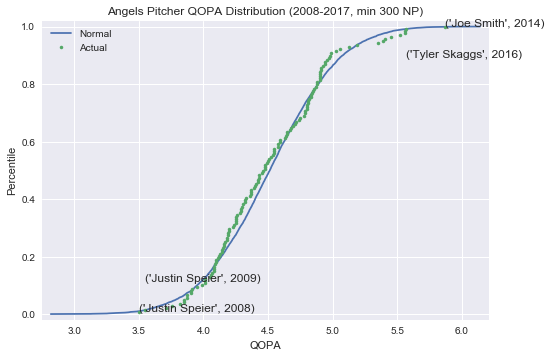

In [25]:
plt.clf()
# Creating ECDF/ checking normal distribution of angels pitchers

# Setting df as QOPA
_ = angels_qopa.QOPA

# creating theoretical dist
mean = np.mean(_)
std = np.std(_)
samples = np.random.normal(mean,std, size=10000)

# Creating ECDF of data and theor
x,y = ecdf(_)
x_theor, y_theor = ecdf(samples)

# Plotting
_ = plt.plot(x_theor,y_theor)
_ = plt.plot(x,y, marker='.', linestyle='none')
_ = plt.xlabel('QOPA')
_ = plt.ylabel('Percentile')
_ = plt.title('Angels Pitcher QOPA Distribution (2008-2017, min 300 NP)')

# Labelling names
__ = angels_qopa.set_index('QOPA').sort_index()
sortedx, sortedy = sorted(x), sorted(y)
max_name = __.iloc[-1].Name
max_year = __.iloc[-1].Year
max_name2 = __.iloc[-1].Name
max_year2 = __.iloc[-1].Year
min_name = __.iloc[0].Name
min_year = __.iloc[0].Year

#Annotation
_ = plt.annotate(xy= (x.max(), y.max()), s=(max_name, max_year))
_ = plt.annotate(xy = (x.min(), y.min()), s=(min_name, min_year))
_ = plt.annotate(xy=(sortedx[-2], sortedy[-2]), s=(__.iloc[-2].Name, __.iloc[-2].Year), xytext=(sortedx[-2],sortedy[-2]-0.1))
_ = plt.annotate(xy=(sortedx[1], sortedy[1]), s=(__.iloc[1].Name, __.iloc[1].Year), xytext=(sortedx[1],sortedy[1]+0.1))

_ = plt.legend(['Normal', 'Actual'])

plt.margins(.02)
plt.show()

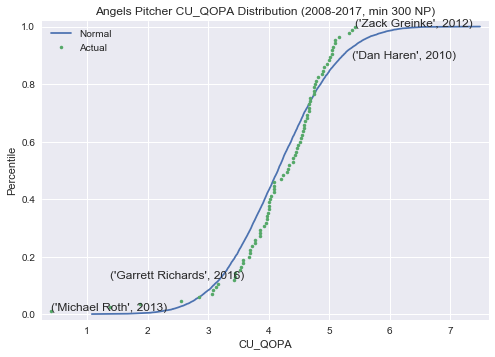

In [26]:
plt.clf()
# Creating ECDF/ checking normal distribution of angels pitchers

stat = 'CU_QOPA'
# Setting df as QOPA
_ = angels_qopa[angels_qopa[stat] > 0][stat]

# creating theoretical dist
mean = np.mean(_)
std = np.std(_)
samples = np.random.normal(mean,std, size=10000)

# Creating ECDF of data and theor
x,y = ecdf(_)
x_theor, y_theor = ecdf(samples)

# Plotting
_ = plt.plot(x_theor,y_theor)
_ = plt.plot(x,y, marker='.', linestyle='none')
_ = plt.xlabel(stat)
_ = plt.ylabel('Percentile')
_ = plt.title('Angels Pitcher {} Distribution (2008-2017, min 300 NP)'.format(stat))

# Labelling names
__ = angels_qopa[angels_qopa[stat] > 0].set_index(stat).sort_index()
sortedx, sortedy = sorted(x), sorted(y)
max_name = __.iloc[-1].Name
max_year = __.iloc[-1].Year
max_name2 = __.iloc[-1].Name
max_year2 = __.iloc[-1].Year
min_name = __.iloc[0].Name
min_year = __.iloc[0].Year

#Annotation
_ = plt.annotate(xy= (x.max(), y.max()), s=(max_name, max_year))
_ = plt.annotate(xy = (x.min(), y.min()), s=(min_name, min_year))
_ = plt.annotate(xy=(sortedx[-2], sortedy[-2]), s=(__.iloc[-2].Name, __.iloc[-2].Year), xytext=(sortedx[-2],sortedy[-2]-0.1))
_ = plt.annotate(xy=(sortedx[1], sortedy[1]), s=(__.iloc[1].Name, __.iloc[1].Year), xytext=(sortedx[1],sortedy[1]+0.1))

_ = plt.legend(['Normal', 'Actual'])

plt.margins(.02)
plt.show()

In [27]:
np.std(angels_qopa[angels_qopa.FF_QOPA > 0])

Year              2.594882
PitcherID    103549.293672
QOPA              0.436792
NP             1063.000514
CH_QOPA           0.650461
CH_NP           203.413339
CU_QOPA           0.848394
CU_NP           180.182670
FC_QOPA           0.711062
FC_NP           238.458523
FF_QOPA           0.596514
FF_NP           438.274375
FS_QOPA           0.497545
FS_NP            91.957609
FT_QOPA           0.812956
FT_NP           289.070588
KC_QOPA           0.468320
KC_NP            60.829170
KN_QOPA                NaN
KN_NP             0.000000
SI_QOPA           0.648886
SI_NP           288.499203
SL_QOPA           0.725590
SL_NP           275.262684
dtype: float64

# Normal Distributions

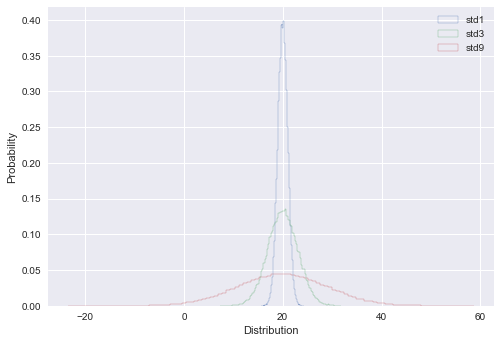

In [28]:
# Examining effect of standard deviation on peaks

# Three normal distributions w/ diff stdandard devs (mean=20, 100,000 samples)
std1 = np.random.normal(20,1,size=100000)
std3 = np.random.normal(20,3,size=100000)
std9 = np.random.normal(20,9,size=100000)

#Plotting them
_ = plt.hist(std1, bins=100, normed=True, histtype='step')
_ = plt.hist(std3, bins=100, normed=True, histtype='step')
_ = plt.hist(std9, bins=100, normed=True, histtype='step')

#Labelling axis & Legend
_ = plt.legend(['std1', 'std3', 'std9'])
_ = plt.xlabel('Distribution')
_ = plt.ylabel('Probability')

plt.show()

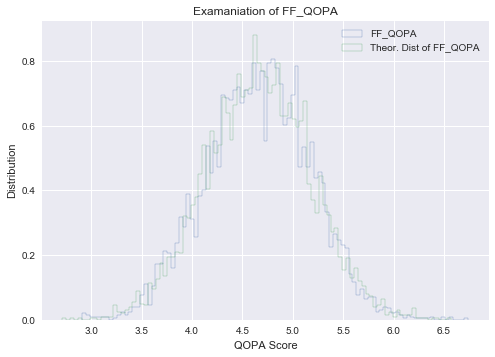

In [29]:
# Examining Pitches for normality
pitch = 'FF_QOPA'
NP = "{}_NP".format(pitch[0:2])
array = qopa_df[(qopa_df[pitch] > 0) & (qopa_df[NP] > 50)]

# Actual distribution
pitch_1 = array[pitch]

# Theoretical
theor_1 = np.random.normal(np.mean(pitch_1), np.std(pitch_1), size=len(array[pitch]))

# Plotting
_ = plt.hist(pitch_1, bins=100, histtype='step', normed=True)
_ = plt.hist(theor_1, bins=100, histtype='step', normed=True)
_ = plt.legend([pitch, 'Theor. Dist of {}'.format(pitch)])
_ = plt.xlabel('QOPA Score')
_ = plt.ylabel('Distribution')
_ = plt.title('Examaniation of {}'.format(pitch))
_ = plt.grid([pitch_1.min(), pitch_1.max(), 0, 1])
plt.show()

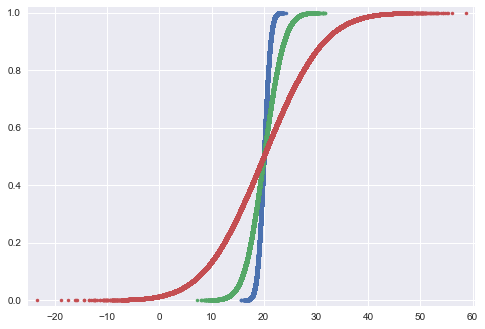

In [30]:
# Examining CDFs using above std devs

# Determining x and y coords
x_1, y_1 = ecdf(std1)
x_3, y_3 = ecdf(std3)
x_9, y_9 = ecdf(std9)

# Plotting
_ = plt.plot(x_1, y_1, '.', linestyle='none')
_ = plt.plot(x_3, y_3, '.', linestyle='none')
_ = plt.plot(x_9, y_9, '.', linestyle='none')
_ = plt.margins(0.02)

plt.show()

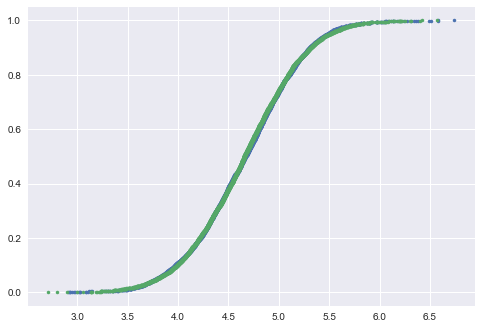

In [31]:
# Trying CDF of pitches

x_FF, y_FF = ecdf(pitch_1)
x_theor, y_theor = ecdf(theor_1)

_ = plt.plot(x_FF, y_FF, '.', linestyle='none')
_ = plt.plot(x_theor, y_theor, '.', linestyle='none')

plt.show()

The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

# Normal/Gaussian Distribtion- Properties & Warnings:
Lightness of tails (outliers > 4 std from mean) should be looked at

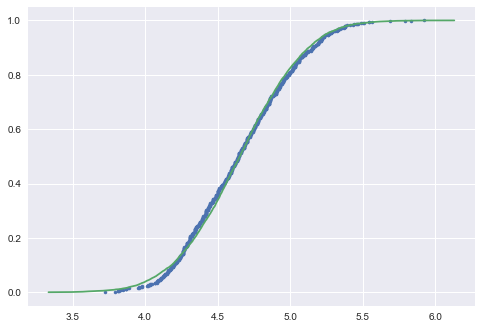

Probability of a SP Year above 5.5 is: 0.010721
There have been 8 SP years w/ QOPA > 5.5 We expect to see 9.284386


In [32]:
# If sample is normally distrubuted, what is chance of starting pitcher having QOPA above 5.5?

# Qualified started- mean*2.2 simulates qualified pitcher (~162 IP)
df = qopa_df[qopa_df.NP > (np.mean(qopa_df.NP)*2.2)].QOPA

# Checking for normal distribution
x,y = ecdf(df)
x_t, y_t = ecdf(np.random.normal(np.mean(df), np.std(df), size=10000))
plt.plot(x,y,'.', linestyle='none')
plt.plot(x_t,y_t)
plt.show()

# Appears normal enough, on to the probability part

mu = np.mean(df)
sigma = np.std(df)
samples = np.random.normal(mu, sigma, size=1000000)

# Probability is number of instances of sample above 5.5 / # trials 
prob = np.sum(samples > 5.5) / len(samples)
print("Probability of a SP Year above 5.5 is: {}".format(prob))
print("There have been {0} SP years w/ QOPA > 5.5 We expect to see {1}".format(np.sum(df > 5.5), prob * len(df)))

In [33]:
qopa_df[qopa_df.NP > (np.mean(qopa_df.NP)*2.2)].sort_values('QOPA')

,PitcherID,Name,QOPA,NP,CH_QOPA,CH_NP,CU_QOPA,CU_NP,FC_QOPA,FC_NP,...,FT_NP,KC_QOPA,KC_NP,KN_QOPA,KN_NP,SI_QOPA,SI_NP,SL_QOPA,SL_NP,Year
519,111838,Paul Byrd,3.72,2549,3.52,578,4.57,240,NaN,2,...,167,NaN,0,NaN,0,NaN,0,3.77,577,2008
419,527054,Julio Teheran,3.79,2976,3.97,263,4.68,292,NaN,0,...,251,NaN,0,NaN,0,NaN,0,3.39,766,2016
410,456043,Jonathan Sanchez,3.81,3602,3.83,581,NaN,0,NaN,0,...,388,NaN,0,NaN,0,NaN,0,3.22,681,2010
151,493137,Daisuke Matsuzaka,3.81,3063,3.17,152,4.06,393,3.81,478,...,160,NaN,0,NaN,0,NaN,0,3.84,436,2008
702,527054,Julio Teheran,3.82,3063,3.78,191,4.47,270,NaN,0,...,509,NaN,0,NaN,0,NaN,0,3.10,605,2017
249,460105,Greg Smith,3.82,3062,3.37,609,3.80,215,NaN,0,...,0,NaN,0,NaN,0,4.25,908,3.52,473,2008
148,432934,Chris Young,3.83,2705,3.69,154,1.06,23,NaN,0,...,0,NaN,0,NaN,0,NaN,0,3.78,731,2014
188,433657,Dave Bush,3.85,3000,3.16,305,4.44,668,3.71,372,...,1306,NaN,0,NaN,0,NaN,0,NaN,0,2010
686,545333,Trevor Bauer,3.87,2864,3.89,362,2.91,336,3.73,390,...,358,NaN,0,NaN,0,NaN,0,4.59,212,2015
514,424144,Oliver Perez,3.87,3179,2.99,105,3.93,40,NaN,0,...,0,NaN,0,NaN,0,4.15,1562,3.47,856,2008


# Exponential Distribution
The waiting time between arrivals of a poisson process are exponentially distributed

# Statistical Thinking in Python P.2

In [34]:
## Optimal Paramaters
### Verify normality by looking at PDF/CDF
## Optimal Paramaters are Paramater values that bring the model in closest agreement w/ data

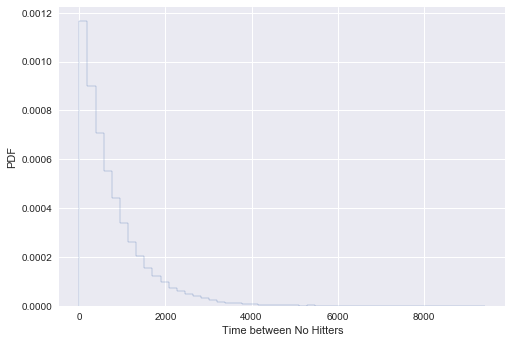

In [35]:
# How often do we get no hitters??

no_hitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

# Assuming Poisson distribution: 
# Need mean of time between events 
tau = np.mean(no_hitter_times)

# draw out exponential distribution
inter_times = np.random.exponential(tau, 100000)

# Plot out PDF
_ = plt.hist(inter_times, bins=50, normed=True, histtype='step')
_ = plt.xlabel('Time between No Hitters')
_ = plt.ylabel('PDF')

plt.show()


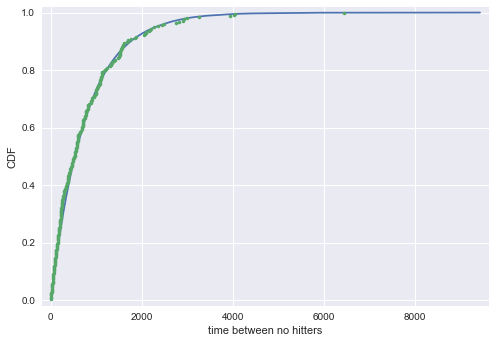

In [36]:
# Checking the data

x,y = ecdf(no_hitter_times)
x_t, y_t = ecdf(inter_times) #inter times are expected exponential distribution

# Plotting
_ = plt.plot(x_t, y_t)
_ = plt.plot(x,y,'.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlabel('time between no hitters')
_ = plt.ylabel('CDF')
plt.show()


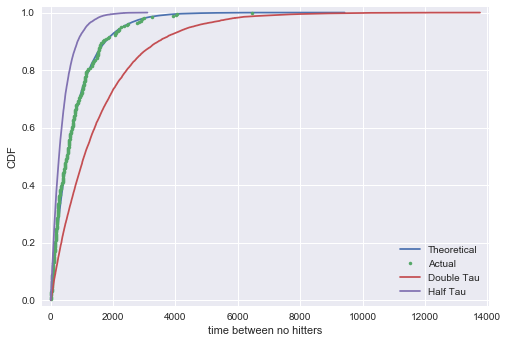

In [37]:
# If Tau were double or half the size, it would affect the fit
x,y = ecdf(no_hitter_times)
x_t, y_t = ecdf(inter_times) #inter times are expected exponential distribution

samplesx2 = np.random.exponential(tau*2, 10000)
sampleshalf = np.random.exponential(tau/2, 10000)

x_2, y_2 = ecdf(samplesx2)
x_1, y_1 = ecdf(sampleshalf)
# Plotting
_ = plt.plot(x_t, y_t)
_ = plt.plot(x,y,'.', linestyle='none')

_ = plt.plot(x_2,y_2)
_ = plt.plot(x_1,y_1)
_ = plt.margins(0.02)
_ = plt.xlabel('time between no hitters')
_ = plt.ylabel('CDF')
_ = plt.legend(['Theoretical', 'Actual', 'Double Tau', 'Half Tau'])
plt.show()

# Linear Regression by Least Squares:
Sometimes two variables are related (similar to Pearson correlation coefficient), looking linearly:
## Parameters are: Slope, intercept (y-axis)
Want to set slope & intercept so points are close as possible to line (minimize variance)
### Residual: Distance from single data point to regression line
Least Squares best fit line: Paramates such that sum of the squares of the residuals is minimal
# slope, intercept = np.polyfit(x_data, y_data, n(degree of polynomial)) # linear=1

In [38]:
def pearson_r(x,y): # covariance/((std of x) * (std of y))
    cor_matrix = np.corrcoef(x,y)
    return round(float(cor_matrix[1,0]),3)

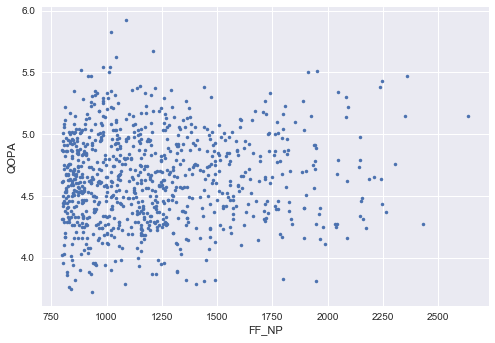

Person Correlation:  0.061


In [39]:
# Looking at correlation between Number of 4-Seam Fastballs and total QOPA
stat1 = 'FF_NP'
stat2 = 'QOPA'
df = qopa_df[qopa_df[stat1] > 800]

_ = plt.plot(df[stat1], df[stat2], '.', linestyle='none')
_ = plt.xlabel(stat1)
_ = plt.ylabel(stat2)
plt.show()
print("Person Correlation: ",pearson_r(df[stat1], df[stat2]))

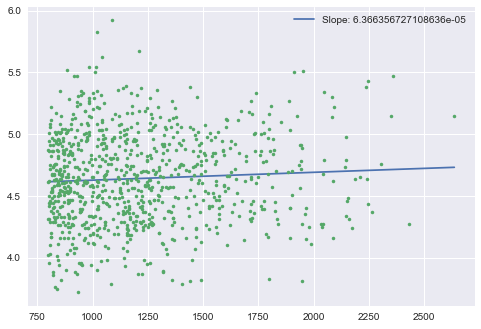

In [40]:
# Performing Linear Regression on the data using np.polyfit
# y = mx+b (slope, x coord, y intercept)
m,b = np.polyfit(df[stat1], df[stat2],1)

# plotting w/ regression lines:
x = np.array([df[stat1].min(),df[stat1].max()]) # Xmin, Xmax
y = m * x + b # y coordinate when xcoord = x

_ = plt.plot(x,y)
_ = plt.plot(df[stat1], df[stat2], '.', linestyle='none')
_ = plt.legend(["Slope: {}".format(m)])
plt.show()

# Importance of EDAs
Datasets can appear to be very similar to each other, but need to be examined w/ graphical EDA first to assess

## Bootstrapping: Use of resampled data to perform statistical inferences
Is the mean/std deviation consistent from one trial to the next? Need to replicate 
## Sampling (w/  or w/o replacement): Resample data based off values to determine diff means
e.g.: data = [1,2,4,5,6,7]

resampled data = [4,2,1,1,7,5] # randomly selected from data and replaced rather than deleted

Can do this a lot of teams to get range of means (and ecdf)
### Bootstrap sample: resampled array of the data
### Bootstrap replicate: Statistic computed from resampled array

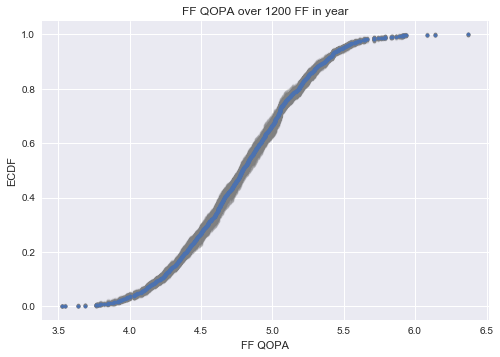

In [133]:
# Taking distribution of quality of fastball of starting pitchers

df = qopa_df[qopa_df.NP > 1800]
ff = df.FB_QOPA

for _ in range(50):
    # Creating 50 ecdfs to get sampled ranges
    sampled = np.random.choice(ff, size=len(ff))
    x,y = ecdf(sampled)
    
    # Plot, make translucent and grey
    _ = plt.plot(x,y,'.', color='grey', alpha= 0.1)

# Now to plot actual distribution
x,y = ecdf(ff)
_ = plt.plot(x,y,'.')
_ = plt.xlabel('FF QOPA')
_ = plt.ylabel('ECDF')
_ = plt.title('FF QOPA over 1200 FF in year')
plt.show()
    

# Boostrap Confidence Intervals
Confidence interval: If we repeated the measurements an infinite # of times, p% of the means would lie in the p% confidence interval

In [153]:
def bootstrap_rep_1d(data, func):
    """Generate bootstrap replicate of 1D data. Retruns specified func(parameter) of bs sample"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs(data, func, size=1):
    '''Drawing bootstrap replicates'''
    # initialize empty array
    bs_reps = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_reps[i] = bootstrap_rep_1d(data,func)
    
    return bs_reps

In [178]:
# Creating database of year by year pitching statistics
pitching_years = pd.read_csv('../MLB_Data/Data/baseballdatabank-2017.1/core/Pitching.csv')
pitching_years = pitching_years[pitching_years.yearID > 1960]
pitching_years = pitching_years.groupby('yearID').sum()
pitching_years['ERA'] = (pitching_years['ER'] * 27)/ pitching_years['IPouts']

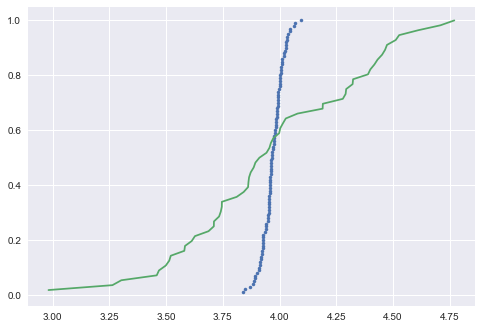

In [185]:
plt.clf()
samples = draw_bs(pitching_years.ERA, np.mean, size=100)
xt,yt = ecdf(samples)
x,y = ecdf(pitching_years.ERA)
_ = plt.plot(xt,yt,'.')
_ = plt.plot(x,y)
plt.show()

In [188]:
# SEM: Standard Error of the Mean
# sem = np.std(data) / np.sqrt(len(data))
print(np.std(pitching_years.ERA) / np.sqrt(len(pitching_years.ERA)))
print(np.std(samples))

0.0520788615609
0.0461870466752


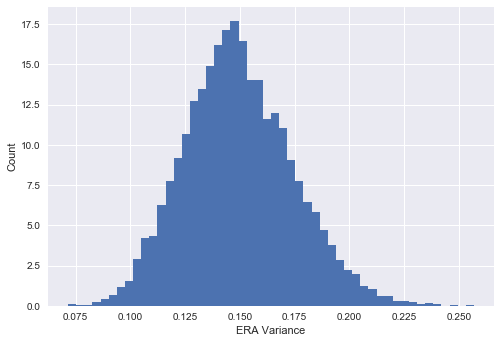

[ 0.10461215  0.20114327]


In [194]:
# Confidence Intervals:
# Variance is not always normally distributed either
samples = draw_bs(pitching_years.ERA, np.var, size=10000)
_ = plt.hist(samples,normed=True, bins=50)
_ = plt.xlabel('ERA Variance')
_ = plt.ylabel('Count')
plt.show()

print(np.percentile(samples,[2.5,97.5]))


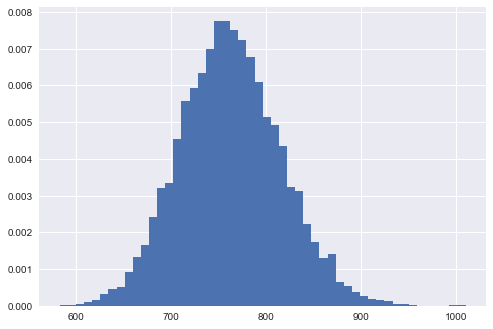

95% Confidence interval is:  [ 662.28486056  870.56593625]


In [202]:
# Confidence interval on rate of no-hitters:

# Draw 10k bs reps of mean no hitter times 
samples = draw_bs(no_hitter_times, np.mean,size=10000)

# Confidence 95% interval
conf = np.percentile(samples, [2.5, 97.5])

# plot
_ = plt.hist(samples, bins=50, normed = True)
plt.show()

# conf interval

print("95% Confidence interval is: ", conf)

# Pairs bootstraps
Previous estimates were done non-parametrically (no assumption about the model/probability distribution underlying the data)
# Linear regression line assumes 2D Relationship- parametric
Tough to get confidence intervals on replications of data without making assumptions- Pairs bootstraps use least assumptions
# Pairs bootstraps for linear regression:
- Resample data in (x,y) pairs

- Compute slope & intercept from resampled pairs

- Each slope and intercept is bootstrap replicate

- Compute confidence intervals from percentiles of bootstrap replicates


In [321]:
# Generating pairs bootstrap sample

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        try:
            bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y, 1)
        except ValueError:
            try:
                bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y, 1)
            except ValueError:
                try:
                    bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y, 1)
                except ValueError:
                    pass
    return bs_slope_reps, bs_intercept_reps

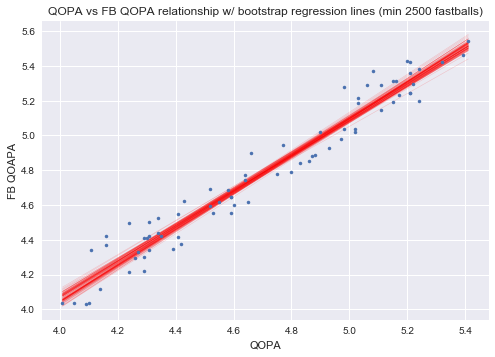

In [331]:
# Plotting Bootstrap Regression Lines
df = qopa_df[qopa_df.FB_NP > 2500].reset_index()
x = df.QOPA
y = df.FB_QOPA

# Determining BS slope, intercept
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(x,y,size=1000)

# X vals
bt_x = np.array([x.min(), x.max()])

# Plotting bs lines
for i in range(100):
    _ = plt.plot(bt_x, bs_slope_reps[i] * bt_x + bs_intercept_reps[i], linewidth=0.5, color='red', alpha=0.2)
    
# Plotting x/y
_ = plt.plot(x,y,'.')
_ = plt.xlabel('QOPA')
_ = plt.ylabel('FB QOAPA')
_ = plt.title('QOPA vs FB QOPA relationship w/ bootstrap regression lines (min 2500 fastballs)')
plt.show()

# Formulating and simulating hypothesis
Previous has been linear relationship and parameters based on this hyp. But need to test first
## Hypothesis testing: Assesment of how reasonable the observed data are assuming a hypothesis is true (null hypothesis)
eg- Ho: Voting data in OH is similar to PA. Check ecdfs, summary statistics (mean, median, std)

Better way: Permutation: simulate the data: Lump data points together, shuffle, assign randomly to PA/OH
### Permutation: random reordering of entries in an array

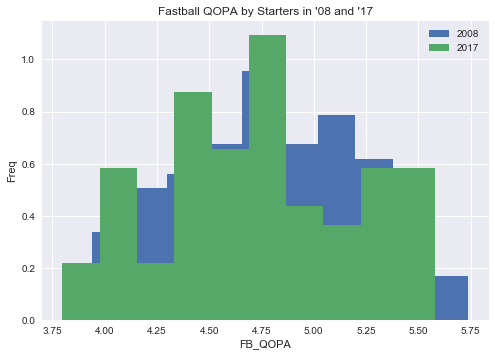

In [396]:
# Null Hypothesis: Starter FB_QOPA in 2008 similar to 2017

# Taking starting pitchers in 08 and 17 and limiting to starters
df1 = (qopa_df[(qopa_df.Year == 2008) & (qopa_df.FB_NP > 1500)].FB_QOPA)
df2 = (qopa_df[(qopa_df.Year == 2017) & (qopa_df.FB_NP > 1500)].FB_QOPA)

# Combining and randomizing
df_comb = np.concatenate((df1, df2))
df_perm = np.random.permutation(df_comb)

# Reassinging random datapoints to each
perm_df1 = df_perm[:len(df1)]
perm_df2 = df_perm[len(df1):]

_ = plt.hist(perm_df1, normed=True)
_ = plt.hist(perm_df2, normed=True)
_ = plt.xlabel('FB_QOPA')
_ = plt.ylabel('Freq')
_ = plt.title("Fastball QOPA by Starters in '08 and '17")
_ = plt.legend(['2008', '2017'])
plt.show()

In [398]:
def permutation_sample(data1, data2):
    '''Function that takes two data sets and returns permutations of same length'''
    data = np.concatenate((data1, data2))
    perm = np.random.permutation(data)
    
    # Returning permutated samples
    perm_1 = perm[:len(data1)]
    perm_2 = perm[len(data2):]
    
    return perm_1, perm_2

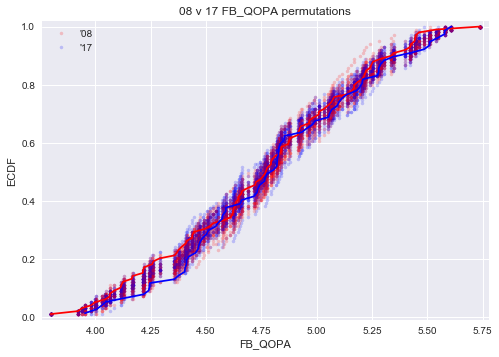

In [408]:
# Visalizing permutation samples
data1 = (qopa_df[(qopa_df.Year == 2008) & (qopa_df.FB_NP > 1500)].FB_QOPA)
data2 = (qopa_df[(qopa_df.Year == 2017) & (qopa_df.FB_NP > 1500)].FB_QOPA)

for _ in range(50):
    
    # Generate 50 permutation samples
    perm_08, perm_17 = permutation_sample(data1, data2)
    
    # Convert to ecdf
    x_1, y_1 = ecdf(perm_08)
    x_2, y_2 = ecdf(perm_17)
    
    # Plotting
    _ = plt.plot(x_1, y_1, '.', linestyle='none', alpha=0.2, color='red')
    _ = plt.plot(x_2, y_2, '.', linestyle='none', alpha=0.2, color='blue')
    
# Now plot original data
x_1, y_1 = ecdf(data1)
x_2, y_2 = ecdf(data2)

_ = plt.plot(x_1, y_1, color='red')
_ = plt.plot(x_2, y_2, color='blue')
_ = plt.xlabel('FB_QOPA')
_ = plt.ylabel('ECDF')
_ = plt.title('08 v 17 FB_QOPA permutations')
_ = plt.legend(["'08","'17"])
_ = plt.margins(0.02)
plt.show()

# Because they overlap they could still be identically distributed

# Test statistics and p value
## Hypothesis testing: how reasonable observed data are assuming Ho is true
Test statistic: single number computed from test data to compare observed v expected (simulated)
    
ie: assume Ho is true (no difference between means)
    - Simulate permutation x times and compute diff
    - compare against actual. dif is p value
    
### P value: probability of value at least as extreme as observed (assuming Ho is true) 

In [412]:
def draw_perm_reps(data1, data2, func, size=1):
    '''Generate multiple permutation replicates'''
    # initialize empty array
    perm_reps = np.empty(size)
    
    # iterate
    for i in range(size):
        # generate two permutations
        perm_1, perm_2 = permutation_sample(data1, data2)
        
        # throwing in perm_reps
        perm_reps[i] = func(perm_1, perm_2)
        
    return perm_reps

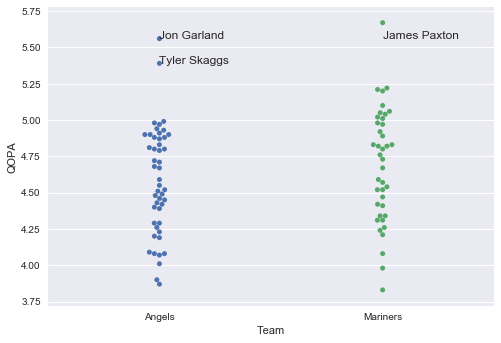

In [493]:
# Hypothesis: Angels SPitches have no FB_QOPA difference from mariners SP

# First: perform a quick eda-swarm plot
ser1 = angels_qopa[angels_qopa.FB_NP > 1100].reset_index().QOPA
ser2 = mariners_qopa[mariners_qopa.FB_NP > 1100].reset_index().QOPA

df = pd.concat([ser1, ser2], axis=1, keys= ['Angels', 'Mariners']).melt()
_ = sns.swarmplot(x='variable', y='value', data=df)
_ = plt.xlabel('Team')
_ = plt.ylabel('QOPA')
_ = plt.annotate(xy=(0,ser1.max()), s=angels_qopa[angels_qopa.FB_NP > 1100].set_index('QOPA').loc[ser1.max()].Name)
_ = plt.annotate(xy=(0,sorted(ser1, reverse=True)[1]), s=angels_qopa[angels_qopa.FB_NP > 1100].set_index('QOPA').loc[sorted(ser1, reverse=True)[1]].Name)
_ = plt.annotate(xy=(1,ser1.max()), s=mariners_qopa[mariners_qopa.FB_NP > 1100].set_index('QOPA').loc[ser2.max()].Name)

plt.show()

# It appears that while the Angels pitchers are a little worse than 

In [498]:
# Hypothesis: Angels SPitches have no FB_QOPA difference from mariners SP

# Checking difference of means
ser1 = angels_qopa[angels_qopa.FB_NP > 1100].reset_index().QOPA
ser2 = mariners_qopa[mariners_qopa.FB_NP > 1100].reset_index().QOPA

def diff_means(data1, data2):
    '''take two datasets and return difference of mean'''
    return (np.mean(data1) - np.mean(data2))

# Get actual difference of means:
empirical_diff = diff_means(ser1, ser2)

# BS replicates
perm_reps = draw_perm_reps(ser1, ser2, diff_means, size=10000)

# Calculate P val
p = np.sum(perm_reps >= empirical_diff) / len(perm_reps)

if p > 0.05:
    print('P-value not significant: ', p)
elif p <= 0.05:
    print('P-value significant: ', p)
    
# We cannot reject the null hypothesis

P-value not significant:  0.9298


# Bootstrap hypothesis testing:
## 1. Clearly state Null Hypothesis
## 2. Define Test statistic
## 3. Generate many sets of simulated data (assuming Ho == True)
## 4. Compute test statistic for each simulated value
## 5. P-value is fraction of simulated statistics >= extreme than real value

In [516]:
# One sample hypothesis testing: ie: other methodology fround mean starting pitcher QOPA to be 4.55 in 2017

# Setting to starters 
df = qopa_df[qopa_df.NP > 1900]
df = df[df.Year == 2017]

# test data
test_pitch = 4.53

# Creating an array of starting qopas
pitching_array = np.array(df.QOPA) 

# Translate data w/ new mean
translated_pitching = pitching_array - np.mean(pitching_array) + test_pitch

# Take bootstrap replicates of the translated data
bs_replicates = draw_bs(translated_pitching, np.mean, 10000)

# Take p value
p = np.sum(bs_replicates >= np.mean(pitching_array)) / 10000

print("P Value: ", p)

P Value:  0.0508


In [519]:
# Two sample tests for identical distribution
# Distribution of 2017 similar to 2009
df = qopa_df[qopa_df.NP > 1900]
year_1 = df[df.Year == 2009].QOPA
year_2 = df[df.Year == 2017].QOPA

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_means(year_1, year_2)

# Concatenate forces: forces_concat
years_concat = np.concatenate((year_1, year_2))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(years_concat, size=len(years_concat))
    
    # Compute replicate
    bs_replicates[i] = diff_means(bs_sample[:len(year_1)],
                                     bs_sample[len(year_2):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / 10000
print('p-value =', p)

p-value = 0.0276


In [521]:
# Compute mean of all forces: mean_force
df = qopa_df[qopa_df.NP > 1900]
year_1 = df[df.Year == 2009].QOPA
year_2 = df[df.Year == 2017].QOPA
years_concat = np.concatenate((year_1, year_2))
empirical_diff_means = diff_means(year_1, year_2)

mean_years = np.mean(years_concat)

# Generate shifted arrays
year_1_shifted = year_1 - np.mean(year_1) + mean_years
year_2_shifted = year_2 - np.mean(year_2) + mean_years 

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_1 = draw_bs(year_1_shifted, np.mean, size=10000)
bs_replicates_2 = draw_bs(year_2_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_1 - bs_replicates_2

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0261


# A/B Testing
### Website redesign click through example: Ho is no difference

In [522]:
# Civil Rights act: Was there a diff between dems and reps voting?

# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yay_dems(dems, reps):
    """Compute fraction of Democrat yay votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yay_dems, size=10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0004


In [541]:
# A/B testing with no hitter times in live ball/dead ball era
nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])
nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
# Generates permutations of same length, taking diff of means, 10k replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_means, size=10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =',p)


p-val = 0.0022


# Test of correlation (pearson=how much variability due to correlation)
when testing whether a is correlated to b with pairs (a1,b1), can use perm samples of a keeping b observed

p-val = 0.0


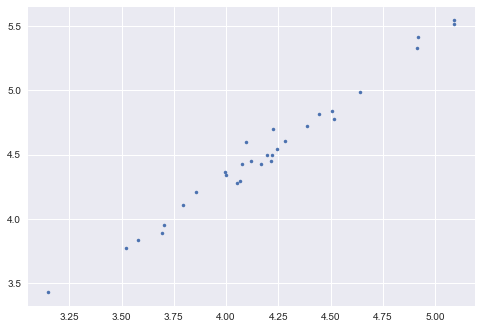

In [581]:
df = pd.read_csv('../MLB_Data/Data/baseballdatabank-2017.1/core/Pitching.csv')
df = df[df.yearID == 2016].groupby('teamID').sum()
df['ERA'] = (df.ER/df.IPouts * 3 * 9)
df['RAvg'] = (df.R/df.IPouts * 3 * 9)
stat1 = df.ERA
stat2 = df.RAvg

# Compute observed correlation: r_obs
r_obs = pearson_r(stat1, stat2)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    
    # Permute ERA measurments: era_permuted (returns permutated array of same length)
    era_permuted = np.random.permutation(stat1)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(era_permuted, stat2)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)
_ = plt.plot(stat1, stat2, '.')
plt.show()

In [646]:
# Checking SP HR data in steroid era vs non steroid era (ie 1995-2007) vs 2007-2016

# Defining arrays
df = pd.read_csv('../MLB_Data/Data/baseballdatabank-2017.1/core/Pitching.csv')
df = df[df.GS > 25]
stat1 = df[(df.yearID > 1990) & (df.yearID < 2008)].HR
stat2 = df[df.yearID > 2007].HR

# Getting observed measure of means
true_diff = diff_means(stat1, stat2)

# Getting combined mean and shifting
overall_mean = np.mean(np.concatenate((stat1, stat2)))
shifted_1 = stat1 - np.mean(stat1) + overall_mean
shifted_2 = stat2 - np.mean(stat2) + overall_mean

# Take 10,000 bs replicates of each data
bs_1 = draw_bs(shifted_1, np.mean, size=10000)
bs_2 = draw_bs(shifted_2, np.mean, size=10000)

bs_reps = bs_1 - bs_2
    
p = np.sum(bs_reps >= true_diff) / len(bs_reps)
print(p)

0.0


# Case Study

1. Graphical & Quantitative EDA
2. Parameter Estimation
3. Confidence interval calculation
4. Hypothesis testing

Guiding Question: Are Curveball QOPAs consitent yty? Slider? Ratio?

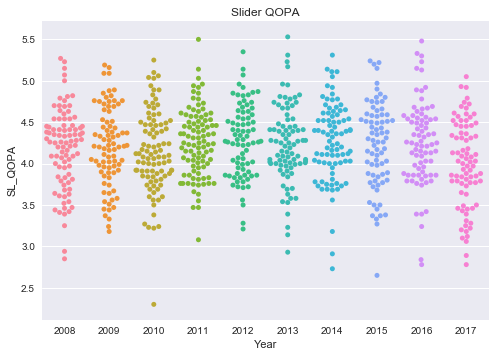

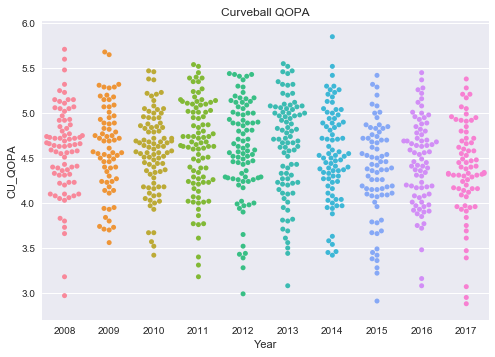

In [670]:
# Starting pitchers-want to limit data to around 1200 SP (4SP/team * 30 teams *10 years)
df = qopa_df[qopa_df.NP > 2000]

# Lets look at swarm plots for Curveball QOPAs and Slider QOPAs (min 100 pitches)
sns.swarmplot(x='Year', y='SL_QOPA', data=df[df.SL_NP > 100])
_ = plt.title('Slider QOPA')
plt.show()

sns.swarmplot(x='Year', y='CU_QOPA', data=df[df.CU_NP > 100])
_ = plt.title('Curveball QOPA')
plt.show()

In [784]:
# Initial EDA

test = pd.DataFrame()
for i in df.index.unique():
    _ = df.loc[i].sort_values('Year')
    temp = np.array(range(len(_)))
    temp2 = np.empty(len(temp))
    for i in range(1,len(temp)):
        temp2[i] = _.iloc[i].QOPA / _.iloc[i-1].QOPA 
    _['seq'] = temp
    _['qopa_change'] = temp2
    test = pd.concat([test, _])

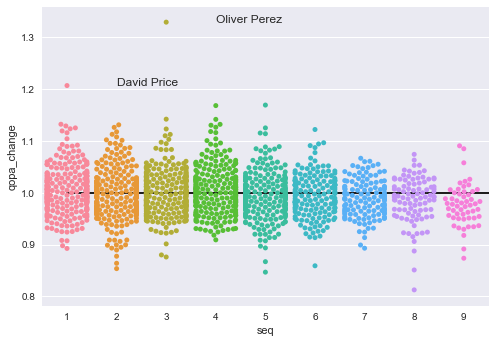

In [816]:
_ = sns.swarmplot(x='seq', y='qopa_change', data=test[test.seq > 0])
_ = plt.annotate(xy= (3, test[test.seq == 3].qopa_change.max()), s=test.reset_index().set_index('qopa_change').loc[test[test.seq == 3].qopa_change.max()].Name)
_ = plt.annotate(xy= (1, test[test.seq == 1].qopa_change.max()), s=test.reset_index().set_index('qopa_change').loc[test[test.seq == 1].qopa_change.max()].Name)

_ = plt.plot([0,10],[1,1], color='black')
plt.show()

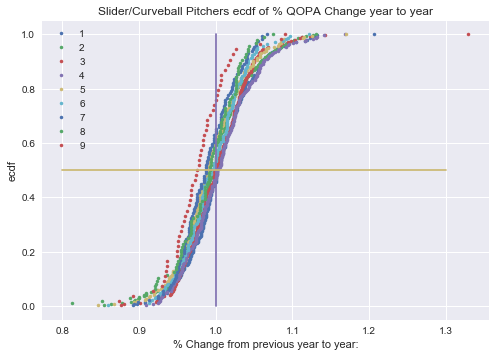

In [833]:
# ECDF of yr to yr change
x1, y1 = ecdf(test[test.seq == 1].qopa_change)
x2, y2 = ecdf(test[test.seq == 2].qopa_change)
x3, y3 = ecdf(test[test.seq == 3].qopa_change)
x4, y4 = ecdf(test[test.seq == 4].qopa_change)
x5, y5 = ecdf(test[test.seq == 5].qopa_change)
x6, y6 = ecdf(test[test.seq == 6].qopa_change)
x7, y7 = ecdf(test[test.seq == 7].qopa_change)
x8, y8 = ecdf(test[test.seq == 8].qopa_change)
x9, y9 = ecdf(test[test.seq == 9].qopa_change)

_ = plt.plot(x1, y1, '.')
_ = plt.plot(x2, y2, '.')
_ = plt.plot(x3, y3, '.')
_ = plt.plot(x4, y4, '.')
_ = plt.plot(x5, y5, '.')
_ = plt.plot(x6, y6, '.')
_ = plt.plot(x7, y7, '.')
_ = plt.plot(x8, y8, '.')
_ = plt.plot(x9, y9, '.')

_ = plt.legend([1,2,3,4,5,6,7,8,9])
#_ = plt.legend([1,3,5,7,9])
_ = plt.plot([1,1], [0,1])
_ = plt.plot([0.8,1.3], [0.5,0.5])
_ = plt.xlabel('% Change from previous year to year:')
_ = plt.ylabel('ecdf')
_ = plt.title('Slider/Curveball Pitchers ecdf of % QOPA Change year to year')
plt.show()

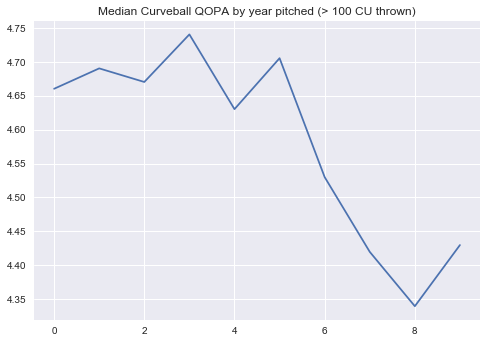

In [766]:
_ = test[test.CU_NP > 300].groupby('seq').median()
_ = plt.plot(_.index, _.CU_QOPA)
_ = plt.title('Median Curveball QOPA by year pitched (> 100 CU thrown)')
plt.show()

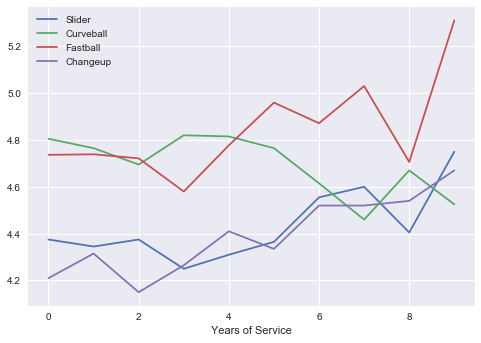

In [776]:
_ = test[(test.SL_NP > 300) & (test.CU_NP > 300)].groupby('seq').median()
plt.plot(_.index, _.SL_QOPA)
plt.plot(_.index, _.CU_QOPA)
plt.plot(_.index, _.FB_QOPA)
plt.plot(_.index, _.CH_QOPA)

_ = plt.xlabel('Years of Service')
_ = plt.legend(['Slider', 'Curveball', 'Fastball', 'Changeup'])
plt.show()

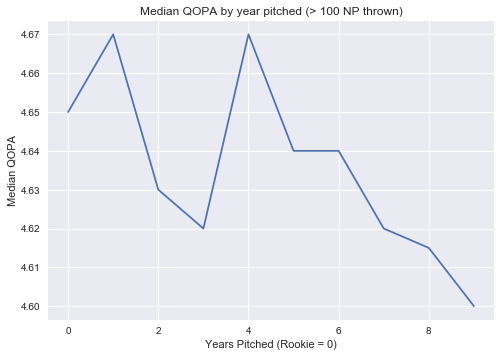

In [771]:
_ = test[test.NP > 300].groupby('seq').median()
_ = plt.plot(_.index, _.QOPA)
_ = plt.title('Median QOPA by year pitched (> 100 NP thrown)')
_ = plt.xlabel('Years Pitched (Rookie = 0)')
_ = plt.ylabel('Median QOPA')
plt.show()

# Notes: Interesting Aging curve on curveballs- can also look at pct change pitch by pitch if need be

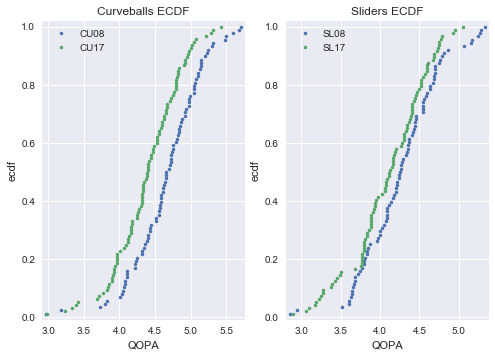

In [815]:
# New project: Looking at QOPA changes in curveball and slider 2007 & 2017

# dataframes 
df = qopa_df[(qopa_df.CU_NP > 100) & (qopa_df.SL_NP > 100)]
df_2008 = df[df.Year == 2008]
df_2017 = df[df.Year == 2017]

# Curveball ecdfs
x_cu_08, y_cu_08 = ecdf(df_2008.CU_QOPA)
x_cu_17, y_cu_17 = ecdf(df_2017.CU_QOPA)

# Slider ecdfs
x_sl_08, y_sl_08 = ecdf(df_2008.SL_QOPA)
x_sl_17, y_sl_17 = ecdf(df_2017.SL_QOPA)

# plotting
plt.subplot(1,2,1)
_ = plt.plot(x_cu_08, y_cu_08, marker='.', linestyle='none')
_ = plt.plot(x_cu_17, y_cu_17, marker='.', linestyle='none')
_ = plt.xlabel('QOPA')
_ = plt.ylabel('ecdf')
_ = plt.legend(['CU08', 'CU17'])
_ = plt.title('Curveballs ECDF')
_ = plt.margins(0.02)

plt.subplot(1,2,2)
_ = plt.plot(x_sl_08, y_sl_08, marker='.', linestyle='none')
_ = plt.plot(x_sl_17, y_sl_17, marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlabel('QOPA')
_ = plt.ylabel('ecdf')
_ = plt.legend(['SL08', 'SL17'])
_ = plt.title('Sliders ECDF')
plt.show()

In [912]:
# simplifying work in future

def cu_sl_analysis():
    df = qopa_df[(qopa_df.CU_NP > 100) & (qopa_df.SL_NP > 100)].reset_index() 
    df_2008 = df[df.Year == 2008].reset_index()
    df_2017 = df[df.Year == 2017].reset_index()
    cu_08 = df_2008.CU_QOPA
    cu_17 = df_2017.CU_QOPA
    sl_08 = df_2008.SL_QOPA
    sl_17 = df_2017.SL_QOPA
    return cu_08, cu_17, sl_08, sl_17

# Parameter Estimates

In [913]:
# Conduct 95% confidence interval of difference of means
df = qopa_df[(qopa_df.CU_NP > 100) & (qopa_df.SL_NP > 100)]
df_2008 = df[df.Year == 2008]
df_2017 = df[df.Year == 2017]

# Calculating diff in means
cu_mean_diff = diff_means(df_2017.CU_QOPA, df_2008.CU_QOPA)
sl_mean_diff = diff_means(df_2017.SL_QOPA, df_2017.SL_QOPA)

# Bootstrapping reps
cu_reps_08 = draw_bs(df_2008.CU_QOPA, np.mean, size=10000)
cu_reps_17 = draw_bs(df_2017.CU_QOPA, np.mean, size=10000)
sl_reps_08 = draw_bs(df_2008.SL_QOPA, np.mean, size=10000)
sl_reps_17 = draw_bs(df_2017.SL_QOPA, np.mean, size=10000)

# differences in reps

bs_diff_cu = cu_reps_17 - cu_reps_08
bs_diff_sl = sl_reps_17 - sl_reps_08

# Confidence intervals
conf_int_cu = np.percentile(bs_diff_cu,[2.5, 97.5])
conf_int_sl = np.percentile(bs_diff_sl,[2.5, 97.5])

print("Curveball 95% Confidence Interval: ", conf_int_cu)
print("Slider 95% Confidence Interval: ", conf_int_sl)

Curveball 95% Confidence Interval:  [-0.41120446 -0.12967494]
Slider 95% Confidence Interval:  [-0.30501075 -0.0249457 ]


In [914]:
# Hypothesis test, are Curveballs/Sliders better in 17 than in 08?

cu_08, cu_17, sl_08, sl_17 = cu_sl_analysis()

# Diff of means, Combine means, BS shifted means, replicates of differences, take p-val of observed

# Diff of means
cu_mean_diff = diff_means(cu_17, cu_08)
sl_mean_diff = diff_means(sl_17, sl_08)

# combined means
combined_means_cu = np.mean(np.concatenate((cu_08, cu_17)))
combined_means_sl = np.mean(np.concatenate((sl_08, sl_17)))

# BS shifted means
cu_08_shifted = cu_08 - np.mean(cu_08) + combined_means_cu 
cu_17_shifted = cu_17 - np.mean(cu_17) + combined_means_cu

sl_08_shifted = sl_08 - np.mean(sl_08) + combined_means_sl
sl_17_shifted = sl_17 - np.mean(sl_17) + combined_means_sl

# BS Reps of shifted
cu_08_shifted_bsreps = draw_bs(cu_08_shifted, np.mean, size=10000)
cu_17_shifted_bsreps = draw_bs(cu_17_shifted, np.mean, size=10000)

sl_08_shifted_bsreps = draw_bs(sl_08_shifted, np.mean, size=10000)
sl_17_shifted_bsreps = draw_bs(sl_17_shifted, np.mean, size=10000)

# bs reps diff
bs_reps_diff_cu = cu_17_shifted_bsreps - cu_08_shifted_bsreps
bs_reps_diff_sl = sl_17_shifted_bsreps - sl_08_shifted_bsreps

# P-vals
p_cu = np.sum(bs_reps_diff_cu <= cu_mean_diff) / len(bs_reps_diff_cu)
p_sl = np.sum(bs_reps_diff_sl <= sl_mean_diff) / len(bs_reps_diff_sl)

# print
print("Curveball Pval = ", p_cu)
print("Slider Pval = ", p_sl)

# There is sufficient evidence to reject the Ho that curveballs and sliders (by pitchers who pitch both) /
# / are not of the same quality in 2017 as they were in 2008

Curveball Pval =  0.0001
Slider Pval =  0.0091


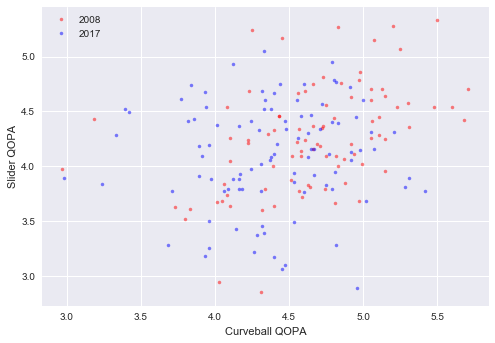

In [915]:
# Did Curveballs and Sliders change together?
# CU/SL index CU_QOPA/SL_QOPA ? 
cu_08, cu_17, sl_08, sl_17 = cu_sl_analysis()

# Scatter plots of data
_ = plt.plot(cu_08, sl_08, '.', color='red', alpha=0.5)
_ = plt.plot(cu_17, sl_17, '.', color='blue', alpha=0.5)

_ = plt.xlabel('Curveball QOPA')
_ = plt.ylabel('Slider QOPA')
_ = plt.legend(['2008', '2017'])

plt.show()

In [916]:
# Linear regression -- reset index to make sure indices are in len(range(x, y))
cu_08, cu_17, sl_08, sl_17 = cu_sl_analysis()

# Slope/int (polyfit), bs slope/int, conf interval (y = m * x + b)

# Linear regression
slope_08, int_08 = np.polyfit(cu_08, sl_08,1)
slope_17, int_17 = np.polyfit(cu_17, sl_17,1)

# BS reps
bs_slope_08, bs_int_08 = draw_bs_pairs_linreg(cu_08, sl_08, size=1000)
bs_slope_17, bs_int_17 = draw_bs_pairs_linreg(cu_17, sl_17, size=1000)

# 95% conf interevals
slope_08_conf = np.percentile(bs_slope_08,[2.5, 97.5])
int_08_conf = np.percentile(bs_int_08,[2.5, 97.5])

slope_17_conf = np.percentile(bs_slope_17,[2.5, 97.5])
int_17_conf = np.percentile(bs_int_17, [2.5, 97.5])

# Print
print("slope 08: ", slope_08_conf)
print("int 08: ", int_08_conf)
print("slope 17: ", slope_17_conf)
print("int 17: ", int_17_conf)

slope 08:  [ 0.2584425   0.65925923]
int 08:  [ 1.18030568  3.07742608]
slope 17:  [-0.13714399  0.22321418]
int 17:  [ 3.06844185  4.67597399]


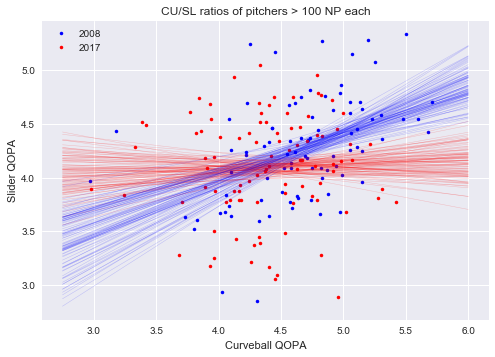

In [917]:
# Linear Regression results
cu_08, cu_17, sl_08, sl_17 = cu_sl_analysis()

# Scatter plot
_ = plt.plot(cu_08, sl_08,'.', color='blue')
_ = plt.plot(cu_17, sl_17,'.', color='red')
_ = plt.xlabel('Curveball QOPA')
_ = plt.ylabel('Slider QOPA')
_ = plt.title('CU/SL ratios of pitchers > 100 NP each')
_ = plt.legend(['2008', '2017'])

# Draw regression lines: y=mx+b (see above numbers)
x = np.array([2.75, 6])
for i in range(100): # or len(bs_slope_reps)
    plt.plot(x, bs_slope_08[i] * x + bs_int_08[i], color='blue', linewidth=0.5, alpha=0.2)
    plt.plot(x, bs_slope_17[i] * x + bs_int_17[i], color='red', linewidth=0.5, alpha=0.2)
    
plt.show()

# This suggests that the quality ratio of cu/sl is not consistent from 08 to 17

In [918]:
# previous data
cu_08, cu_17, sl_08, sl_17 = cu_sl_analysis()

# Confidence intervals of ratio changes

# Compute CU/SL ratio
ratio_08 = cu_08/sl_08
ratio_17 = cu_17/sl_17

# Take mean CU/SL
mean_ratio_08 = np.mean(ratio_08)
mean_ratio_17 = np.mean(ratio_17)

# Bootstrap reps
bs_ratio_08 = draw_bs(ratio_08, np.mean, size=10000)
bs_ratio_17 = draw_bs(ratio_17, np.mean, size=10000)

# Confidence intervals
conf_interval_08 = np.percentile(bs_ratio_08, [0.5, 99.5])
conf_interval_17 = np.percentile(bs_ratio_17, [0.5, 99.5])

print("2008 99% conf interval: ",conf_interval_08)
print("2017 99% conf interval: ",conf_interval_17)

2008 99% conf interval:  [ 1.06646385  1.13756126]
2017 99% conf interval:  [ 1.04180094  1.13479937]


In [965]:
# previous data
cu_08, cu_17, sl_08, sl_17 = cu_sl_analysis()

# Confidence interval of ratios
# Compute CU/SL ratio
ratio_08 = cu_08/sl_08
ratio_17 = cu_17/sl_17

# Take mean CU/SL
mean_ratio_08 = np.mean(ratio_08)
mean_ratio_17 = np.mean(ratio_17)
ratio_diff = mean_ratio_17 - mean_ratio_08

# Bootstrap reps
bs_ratio_08 = draw_bs(ratio_08, np.mean, size=10000)
bs_ratio_17 = draw_bs(ratio_17, np.mean, size=10000)

p = np.sum((bs_ratio_17 - bs_ratio_08) >= ratio_diff)/ len(bs_ratio_08)
print("p val: ", p)

p val:  0.4982


In [962]:
# Heritability - not really applicable here

0.50090000000000001

In [966]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size): # replicates 
        bs_inds = np.random.choice(inds, len(inds)) # takes random sampling of indexes
        bs_x, bs_y = x[bs_inds], y[bs_inds] # creates random data array from bs_inds random indice array
        bs_replicates[i] = func(bs_x, bs_y) # apply function on bootstrapped arrays

    return bs_replicates

In [970]:
# Heritability continued - ehh
cu_08, cu_17, sl_08, sl_17 = cu_sl_analysis()


# Compute the Pearson correlation coefficients
r_08 = pearson_r(cu_08, sl_08)
r_17 = pearson_r(cu_17, sl_17)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_08 = draw_bs_pairs(cu_08, sl_08, pearson_r, size=1000)
bs_replicates_17 = draw_bs_pairs(cu_17, sl_17, pearson_r, size=1000)


# Compute 95% confidence intervals
conf_int_08 = np.percentile(bs_replicates_08, [2.5, 97.5])
conf_int_17 = np.percentile(bs_replicates_17, [2.5, 97.5])

# Print results
print('2008:', r_08, conf_int_08)
print('2017:', r_17, conf_int_17)

# Not sure if usefull here- better for parent/child relationship
# Shows a closer relationship in 08 between cu/sl than in 17

2008: 0.452 [ 0.28795   0.603025]
2017: 0.039 [-0.143075  0.212025]


# NB Heritability
Measuring heritability
Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. In this exercise, you will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

This exercise highlights a very important point. Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.


In [971]:
# More heritability
cu_08, cu_17, sl_08, sl_17 = cu_sl_analysis()


def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0] # returns covariance of parent/off / cov parent

# Compute the heritability
heritability_08 = heritability(cu_08, sl_08)
heritability_17 = heritability(cu_17, sl_17)

# Acquire 1000 bootstrap replicates of heritability
replicates_08 = draw_bs_pairs(
        cu_08, sl_08, heritability, size=1000)
        
replicates_17 = draw_bs_pairs(
        cu_17, sl_17, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_08 = np.percentile(conf_int_08,[2.5,97.5])
conf_int_17 = np.percentile(conf_int_17, [2.5, 97.5])

# Print results
print('2008:', heritability_08, conf_int_08)
print('2017:', heritability_17, conf_int_17)

2008: 0.444305420842 [ 0.29582687  0.59514812]
2017: 0.0394903354085 [-0.1341975  0.2031475]


In [974]:
# Checking permutations of curveball slider change. Is positive cu/sl correlation due to random chance or cu variance?
cu_08, cu_17, sl_08, sl_17 = cu_sl_analysis()
heritability_08 = heritability(cu_08, sl_08)

# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    cu_08_perm = np.random.permutation(cu_08)
    perm_replicates[i] = heritability(cu_08_perm, sl_08)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_08) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0001


# Wrap up- can now:
Perform EDA
    - generate effective plots like ecdfs
    - compute summary statistics
Estimate parameters
    - by optimiation, including linear regression
    - determine confidence intervals
Formulate/test hypothesis


future directions: fuck it got deleted
fb bias for qopa- standardize each pitch?
knuckle curve
spin rate affect?
average velocity increase?
Are pitchers becoming more specialized? 